In [2]:
pip install tensorflow keras opencv-python scikit-learn matplotlib pandas


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Input
import matplotlib.pyplot as plt

In [5]:
# Define directories for train, test, and validation
train_dir = 'C:\\Users\\dell\\Downloads\\archive\\emotion_detection'
test_dir = 'C:\\Users\\dell\\Downloads\\archive\\emotion_detection'
val_dir = 'C:\\Users\\dell\\Downloads\\archive\\emotion_detection'

In [6]:
datainfo = pd.read_csv('C:\\Users\\dell\\Downloads\\archive\\emotion_detection\\data_info.csv')
print("Datainfo Loaded:", datainfo)

Datainfo Loaded:                         path    set     target
0            train/sad_0.png  train        sad
1          train/angry_1.png  train      angry
2          train/happy_2.png  train      happy
3      train/surprised_3.png  train  surprised
4        train/neutral_4.png  train    neutral
...                      ...    ...        ...
35882          test/5378.png   test        NaN
35883          test/5379.png   test        NaN
35884          test/5380.png   test        NaN
35885          test/5381.png   test        NaN
35886          test/5382.png   test        NaN

[35887 rows x 3 columns]


In [7]:
 #Define image properties
IMG_SIZE = 48  # Image size (48x48 pixels, typical for emotion detection)
BATCH_SIZE = 64


In [8]:
# ImageDataGenerator to load and preprocess the images
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    rotation_range=10,   # Data augmentation: small rotations
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [9]:
val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)


In [10]:
# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
    class_mode='categorical'  # Categorical since we are classifying emotions
)

Found 35887 images belonging to 3 classes.


In [11]:
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
    class_mode='categorical'
)

Found 35887 images belonging to 3 classes.


In [12]:
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
    class_mode='categorical'
)

Found 35887 images belonging to 3 classes.


In [13]:
# Get the number of emotion classes (e.g., happy, sad, angry, etc.)
num_classes = len(train_generator.class_indices)


In [14]:
# Define the CNN model
model = Sequential()
# Use Input layer to define the input shape
model.add(Input(shape=(IMG_SIZE, IMG_SIZE, 1)))  # Input for grayscale images

# Add Convolutional and Pooling layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten and Fully Connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))


In [17]:
 #Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary to check
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 838,531 (3.20 MB)

 Trainable params: 838,531 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=5,  # Reduce for initial testing
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)


Epoch 1/5


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


560/560 ━━━━━━━━━━━━━━━━━━━━ 406s 713ms/step - accuracy: 0.6916 - loss: 0.8507 - val_accuracy: 0.7000 - val_loss: 0.8293
Epoch 2/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.7344 - loss: 0.7874 - val_accuracy: 0.6809 - val_loss: 0.8512
Epoch 3/5


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


560/560 ━━━━━━━━━━━━━━━━━━━━ 90s 161ms/step - accuracy: 0.7014 - loss: 0.8233 - val_accuracy: 0.7000 - val_loss: 0.8266
Epoch 4/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - accuracy: 0.7188 - loss: 0.8001 - val_accuracy: 0.6809 - val_loss: 0.8531
Epoch 5/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 90s 159ms/step - accuracy: 0.6973 - loss: 0.8286 - val_accuracy: 0.7001 - val_loss: 0.8203


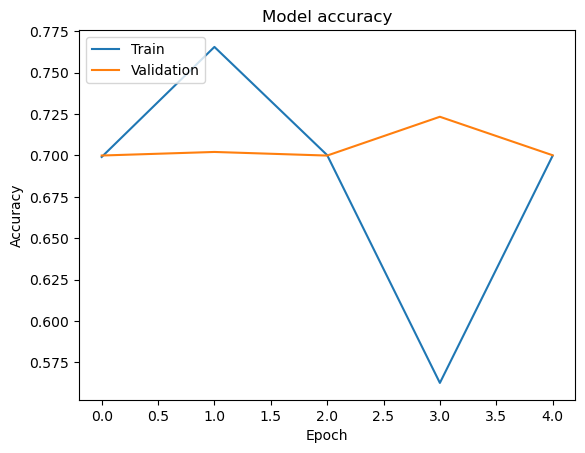

In [40]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Save the model
model.save('emotion_detection_model.h5')


  1/561 ━━━━━━━━━━━━━━━━━━━━ 3:12 344ms/step - accuracy: 0.7344 - loss: 0.7719

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


561/561 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.7027 - loss: 0.8157


Test Accuracy: 70.00%


In [1]:
# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load a batch of images from the test set
test_images, test_labels = next(test_generator)

# Make predictions on the test images
predictions = model.predict(test_images)

# Convert predictions to label index
predicted_emotions = np.argmax(predictions, axis=1)

# Plot and display the images along with predicted emotion
plt.figure(figsize=(10, 10))
for i in range(1):  # Display the first 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')  # Display the image
    plt.title(f"Predicted: {emotion_labels[predicted_emotions[i]]}")  # Show predicted label
    plt.axis('off')  # Hide axis

NameError: name 'test_generator' is not defined